In [1]:
# imports
from Utils.Imports import *

# models
from Models.BuildEncoder import BuildEncoder
from Models.BuildDecoder import BuildDecoder

ImportError: No module named Utils.Imports

In [11]:
device = torch.device(GetLowestGPU())

Device set to cuda:0


In [4]:
path = '../../Data/VirtualPopulations/TumorHet/'

# load training data 
images = np.load(path + 'images.npy')
times = np.load(path + 'times.npy')

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/VirtualPopulations/TumorHet/images.npy'

In [4]:
# 0/1 normalize
img_min = np.min(images)
images -= img_min
img_max = np.max(images)
images /= img_max
img_min, img_max

(-1.1833481641683134e-42, 985156673.7807529)

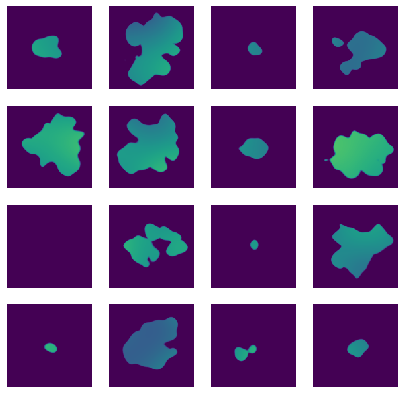

In [5]:
min, max = -1.1833481641683134e-42, 985156673.7807529

# split into training and validation sets
p = np.random.permutation(len(images))
images = images[p]
labels = times[p]

# convert to torch tensors
images = torch.from_numpy(images).float().to(device)
labels = torch.from_numpy(labels).float().to(device)

# plot random examples
fig = plt.figure(figsize=(7,7))
for i in range(16):
    rand_idx = np.random.choice(len(images))
    input = images[rand_idx].detach().cpu().numpy()
    input = np.squeeze(input)
    ax = fig.add_subplot(4, 4, i+1)
    plt.imshow(input*max+min, vmin=min, vmax=max)
    plt.axis('off')
    plt.axis('tight')
plt.show()

In [6]:
latent_dim = 100
layers = [16, 32, 64, 128, 256]
image_shape = (1, 128, 128)
final_shape = int(image_shape[1] / (2**len(layers)))

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.generator = BuildDecoder(
            latent_dim=latent_dim,
            init_shape=[layers[-1], final_shape, final_shape],
            layers=layers[::-1],
            output_channels=image_shape[0],
            activation=nn.ReLU(),
            addl_convs=0,
            use_batchnorm=True)
        self.sigmoid = nn.Sigmoid()
    def forward(self, z):
        generated = self.generator(z)
        generated = self.sigmoid(generated)
        return generated
    
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.image_shape = image_shape
        discriminator_input = list(image_shape)
        self.discriminator = BuildEncoder(
            input_shape=discriminator_input,
            latent_dim=1,
            layers=layers,
            activation=nn.LeakyReLU(negative_slope=0.2, inplace=True),
            addl_convs=0,
            use_batchnorm=True,
            dropout_rate=0.5)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        return self.sigmoid(self.discriminator(x))

In [7]:
G = Generator().to(device)
D = Discriminator().to(device)
optG = torch.optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
optD = torch.optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training

Iter 1 | 3 ms | G loss = 7.7199e-01 | D loss = 6.8145e-01 | D acc = 0.59 | Remaining = 2:25:39     

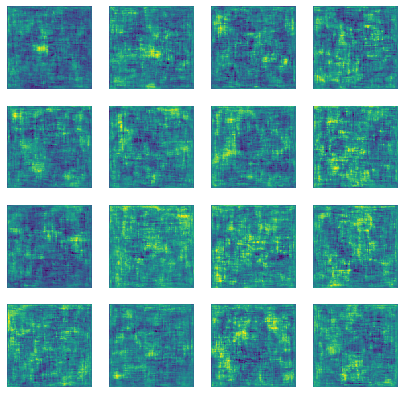

Iter 1001 | 2 ms | G loss = 9.0648e-01 | D loss = 6.4217e-01 | D acc = 0.62 | Remaining = 2:12:03     

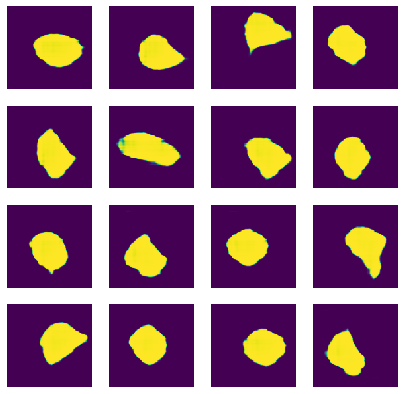

Iter 2001 | 2 ms | G loss = 7.6980e-01 | D loss = 7.0249e-01 | D acc = 0.58 | Remaining = 2:03:06      

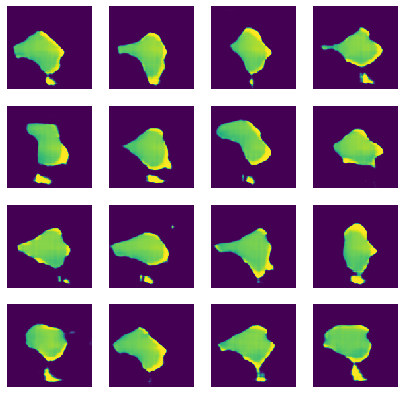

Iter 3001 | 2 ms | G loss = 1.0596e+00 | D loss = 5.9264e-01 | D acc = 0.64 | Remaining = 1:58:36     

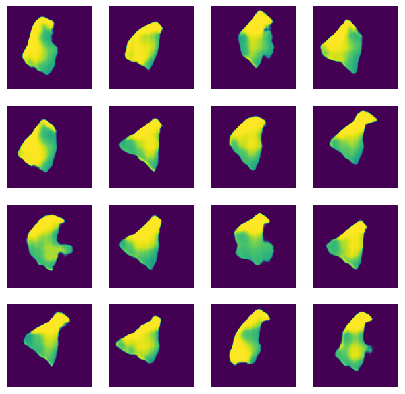

Iter 4001 | 2 ms | G loss = 6.3686e-01 | D loss = 7.3549e-01 | D acc = 0.48 | Remaining = 1:55:07     

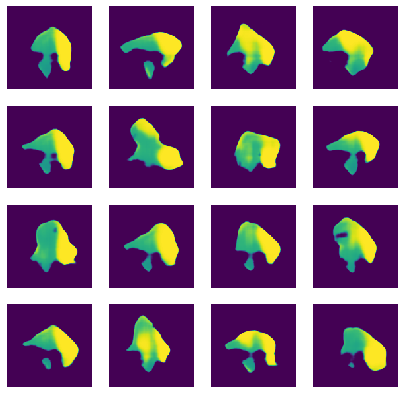

Iter 5001 | 2 ms | G loss = 6.6372e-01 | D loss = 7.0519e-01 | D acc = 0.48 | Remaining = 1:52:05     

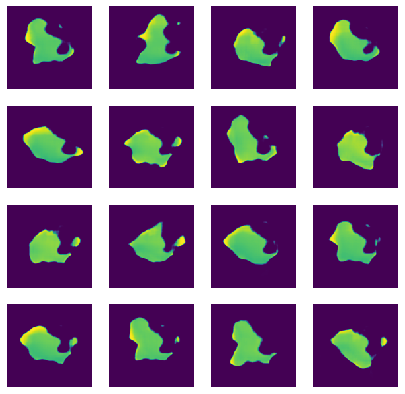

Iter 6001 | 2 ms | G loss = 7.3899e-01 | D loss = 7.0260e-01 | D acc = 0.51 | Remaining = 1:49:16     

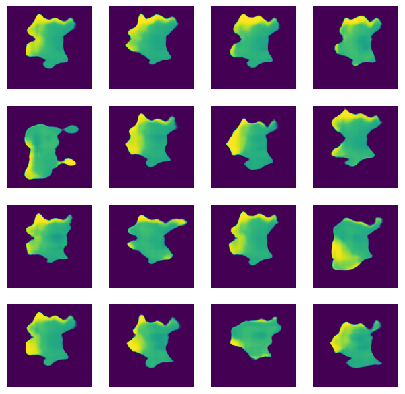

Iter 7001 | 2 ms | G loss = 8.6738e-01 | D loss = 6.9054e-01 | D acc = 0.57 | Remaining = 1:46:31     

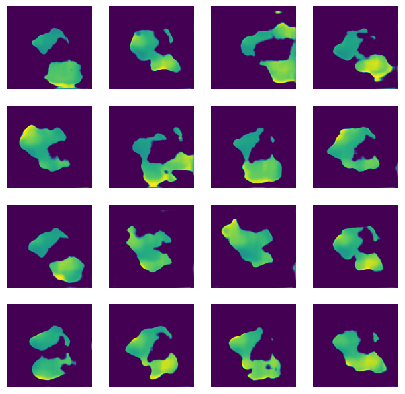

Iter 8001 | 2 ms | G loss = 6.7101e-01 | D loss = 7.3363e-01 | D acc = 0.46 | Remaining = 1:43:52     

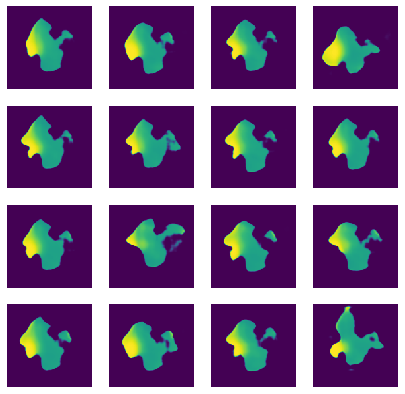

Iter 9001 | 2 ms | G loss = 8.0750e-01 | D loss = 6.8575e-01 | D acc = 0.58 | Remaining = 1:41:13     

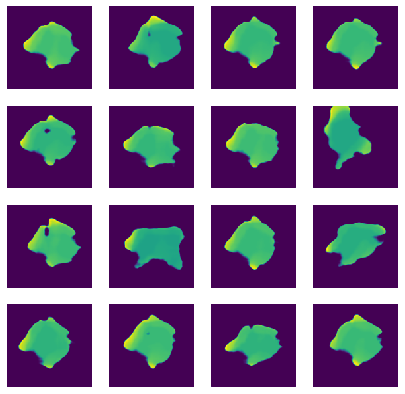

Iter 10001 | 2 ms | G loss = 7.0689e-01 | D loss = 6.7510e-01 | D acc = 0.59 | Remaining = 1:38:37     

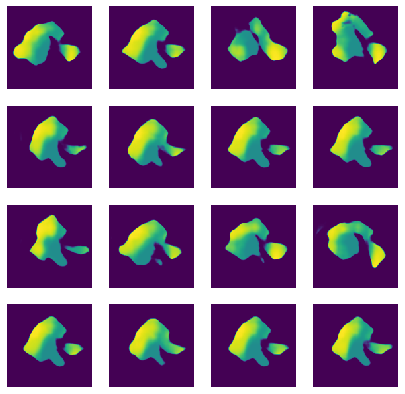

Iter 11001 | 2 ms | G loss = 8.9198e-01 | D loss = 6.9518e-01 | D acc = 0.55 | Remaining = 1:36:03     

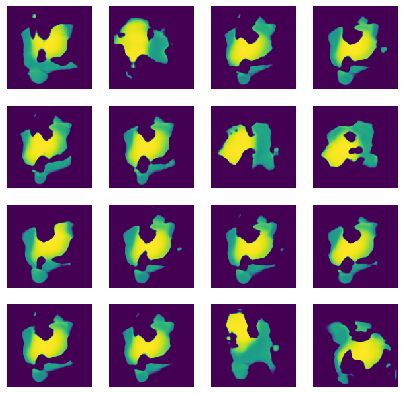

Iter 12001 | 2 ms | G loss = 8.6735e-01 | D loss = 6.4962e-01 | D acc = 0.66 | Remaining = 1:33:30     

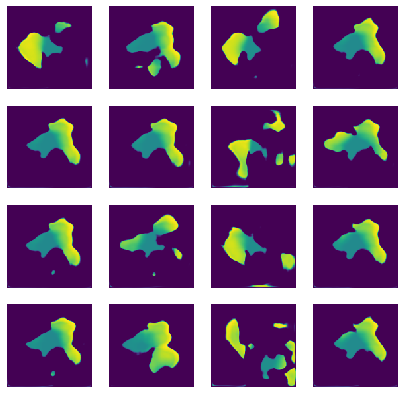

Iter 13001 | 2 ms | G loss = 6.5047e-01 | D loss = 6.9867e-01 | D acc = 0.54 | Remaining = 1:30:58     

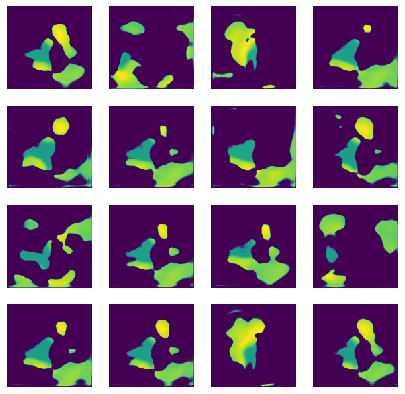

Iter 14001 | 2 ms | G loss = 7.9967e-01 | D loss = 7.2231e-01 | D acc = 0.53 | Remaining = 1:28:27     

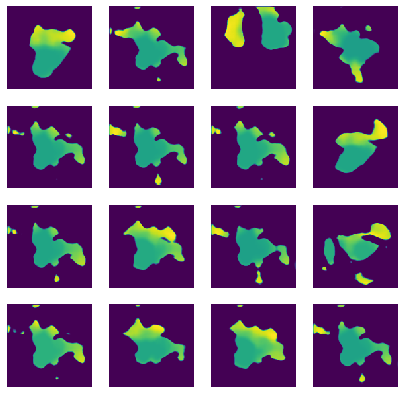

Iter 15001 | 2 ms | G loss = 7.2007e-01 | D loss = 7.3850e-01 | D acc = 0.38 | Remaining = 1:25:57     

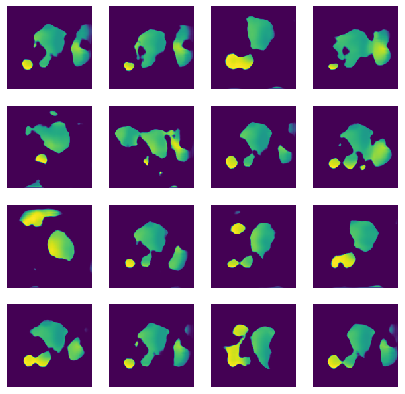

Iter 16001 | 2 ms | G loss = 7.0760e-01 | D loss = 6.1958e-01 | D acc = 0.69 | Remaining = 1:23:27     

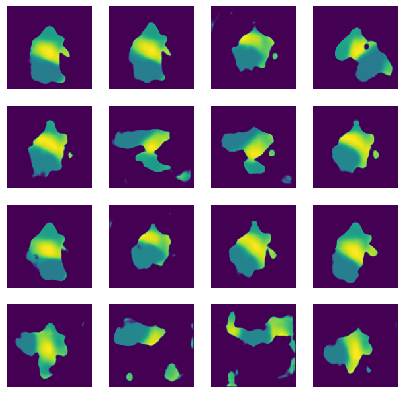

Iter 17001 | 2 ms | G loss = 9.0232e-01 | D loss = 7.2354e-01 | D acc = 0.50 | Remaining = 1:20:57     

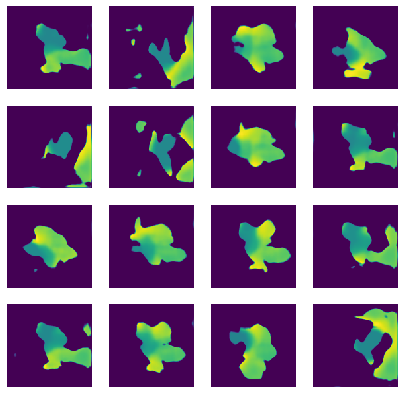

Iter 18001 | 2 ms | G loss = 6.4535e-01 | D loss = 6.8802e-01 | D acc = 0.53 | Remaining = 1:18:28     

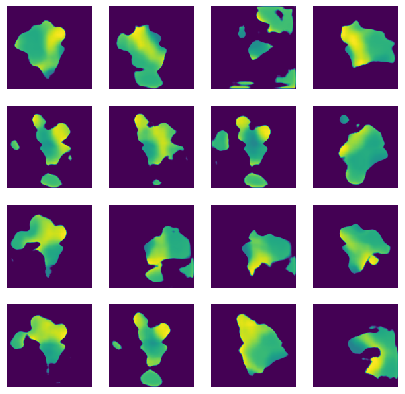

Iter 19001 | 2 ms | G loss = 7.3254e-01 | D loss = 7.1685e-01 | D acc = 0.46 | Remaining = 1:15:59     

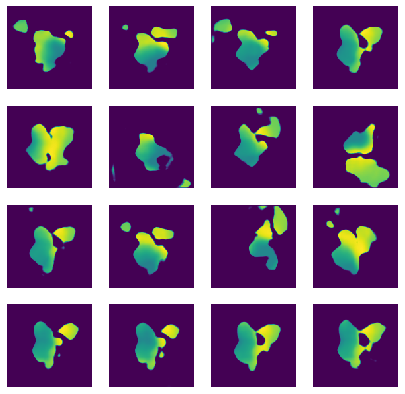

Iter 20001 | 2 ms | G loss = 8.5004e-01 | D loss = 6.8825e-01 | D acc = 0.58 | Remaining = 1:13:30     

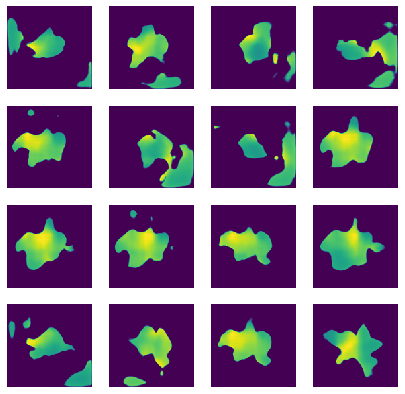

Iter 21001 | 2 ms | G loss = 8.0645e-01 | D loss = 6.8815e-01 | D acc = 0.55 | Remaining = 1:11:02     

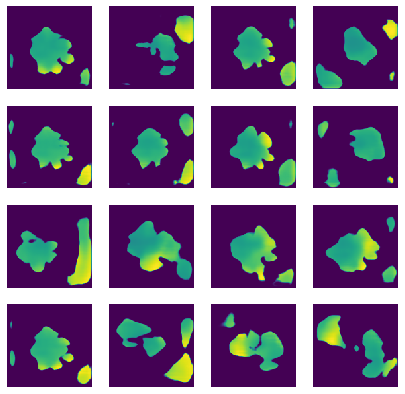

Iter 22001 | 2 ms | G loss = 9.1530e-01 | D loss = 7.0313e-01 | D acc = 0.55 | Remaining = 1:08:34     

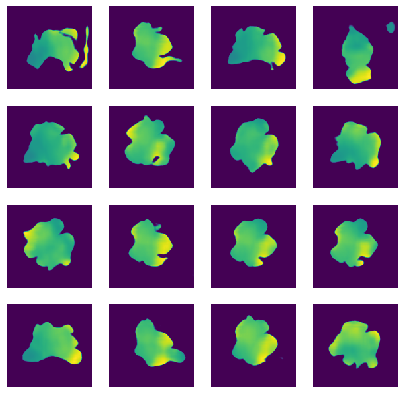

Iter 23001 | 2 ms | G loss = 7.7093e-01 | D loss = 5.8800e-01 | D acc = 0.70 | Remaining = 1:06:06     

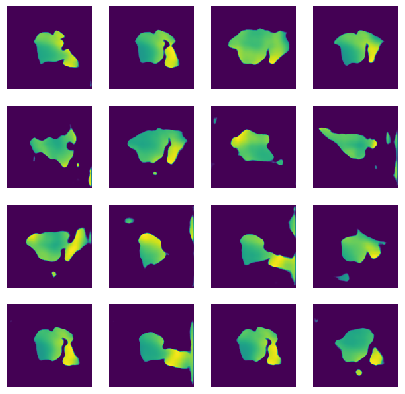

Iter 24001 | 2 ms | G loss = 1.0935e+00 | D loss = 5.5936e-01 | D acc = 0.66 | Remaining = 1:03:38     

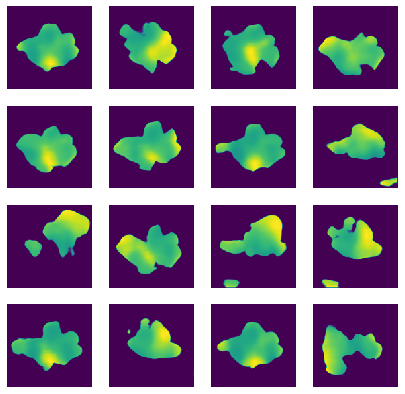

Iter 25001 | 2 ms | G loss = 7.4864e-01 | D loss = 6.3662e-01 | D acc = 0.66 | Remaining = 1:01:10     

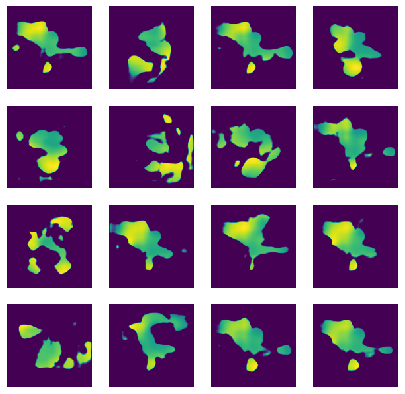

Iter 26001 | 2 ms | G loss = 7.6496e-01 | D loss = 6.7119e-01 | D acc = 0.55 | Remaining = 0:58:43     

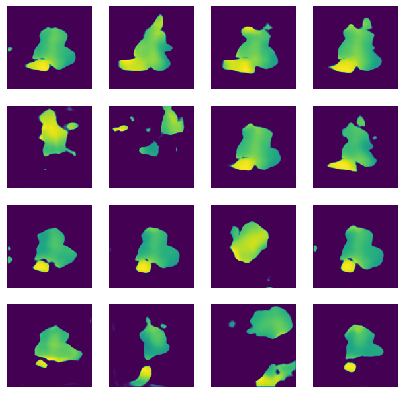

Iter 27001 | 2 ms | G loss = 9.1533e-01 | D loss = 7.7623e-01 | D acc = 0.41 | Remaining = 0:56:15     

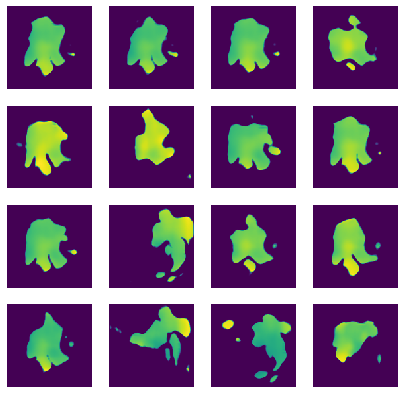

Iter 28001 | 2 ms | G loss = 7.4225e-01 | D loss = 5.1088e-01 | D acc = 0.80 | Remaining = 0:53:48     

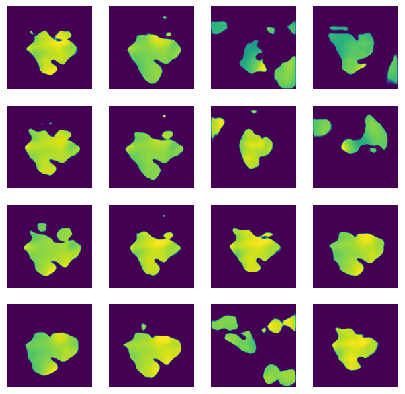

Iter 29001 | 2 ms | G loss = 7.5005e-01 | D loss = 6.5234e-01 | D acc = 0.59 | Remaining = 0:51:21     

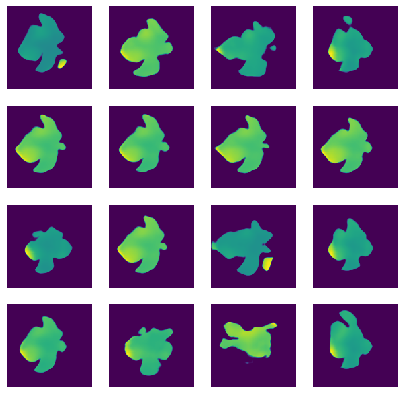

Iter 30001 | 2 ms | G loss = 5.9703e-01 | D loss = 6.8682e-01 | D acc = 0.57 | Remaining = 0:48:54     

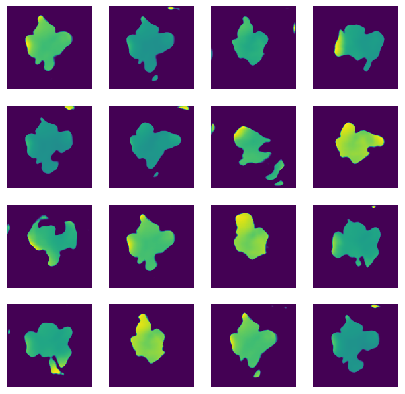

Iter 31001 | 2 ms | G loss = 9.2406e-01 | D loss = 5.6196e-01 | D acc = 0.73 | Remaining = 0:46:27     

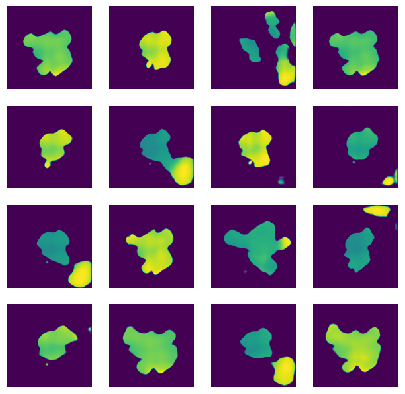

Iter 32001 | 2 ms | G loss = 6.8232e-01 | D loss = 7.1857e-01 | D acc = 0.50 | Remaining = 0:44:00     

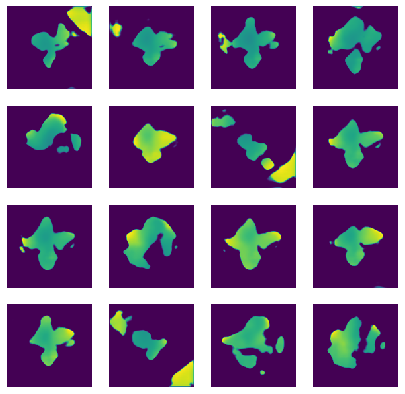

Iter 33001 | 2 ms | G loss = 7.9214e-01 | D loss = 5.6643e-01 | D acc = 0.74 | Remaining = 0:41:33      

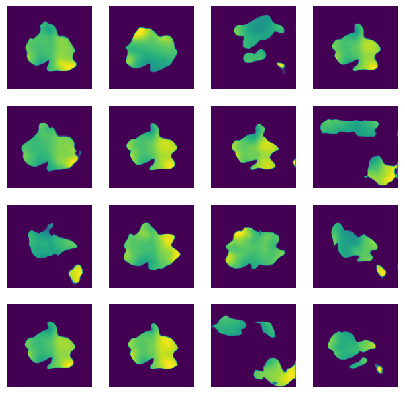

Iter 34001 | 2 ms | G loss = 5.1398e-01 | D loss = 6.0197e-01 | D acc = 0.68 | Remaining = 0:39:07      

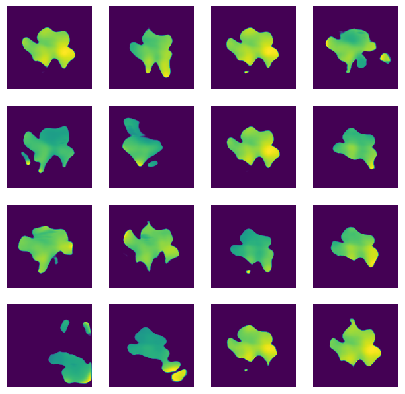

Iter 35001 | 2 ms | G loss = 9.1062e-01 | D loss = 6.9082e-01 | D acc = 0.56 | Remaining = 0:36:40     

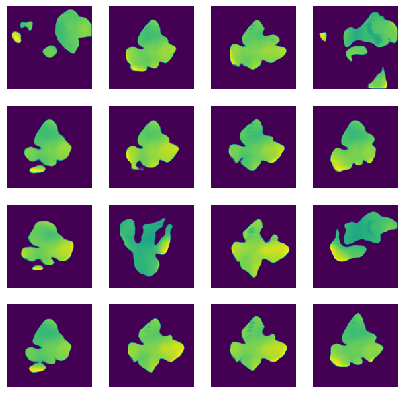

Iter 36001 | 2 ms | G loss = 7.7885e-01 | D loss = 6.9019e-01 | D acc = 0.52 | Remaining = 0:34:13      

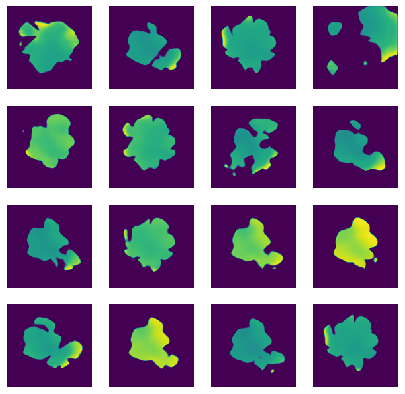

Iter 37001 | 2 ms | G loss = 1.4233e+00 | D loss = 6.3264e-01 | D acc = 0.66 | Remaining = 0:31:47      

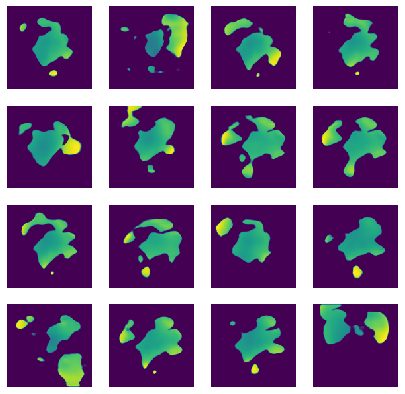

Iter 38001 | 2 ms | G loss = 1.0496e+00 | D loss = 5.8894e-01 | D acc = 0.68 | Remaining = 0:29:20      

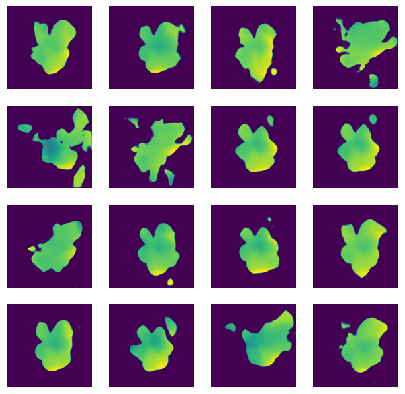

Iter 39001 | 2 ms | G loss = 8.2659e-01 | D loss = 7.3125e-01 | D acc = 0.53 | Remaining = 0:26:54      

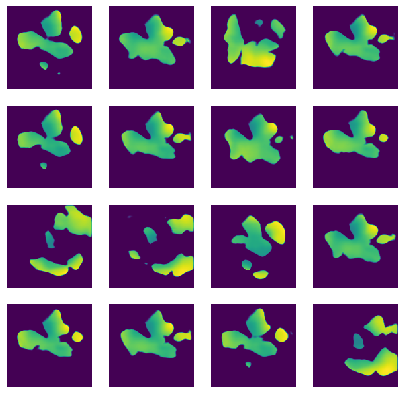

Iter 40001 | 2 ms | G loss = 7.0045e-01 | D loss = 5.1940e-01 | D acc = 0.77 | Remaining = 0:24:28      

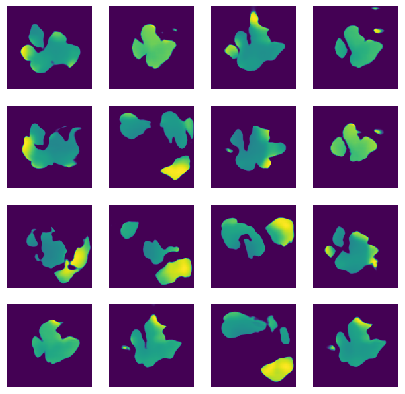

Iter 41001 | 2 ms | G loss = 7.4480e-01 | D loss = 7.4902e-01 | D acc = 0.48 | Remaining = 0:22:01      

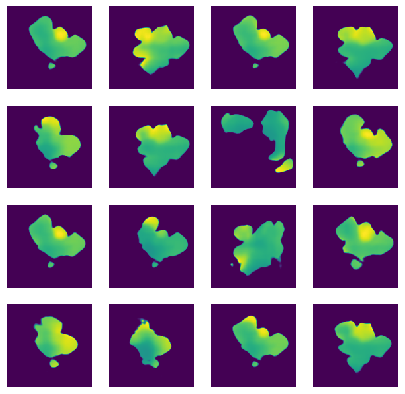

Iter 42001 | 2 ms | G loss = 5.3361e-01 | D loss = 6.0147e-01 | D acc = 0.71 | Remaining = 0:19:35      

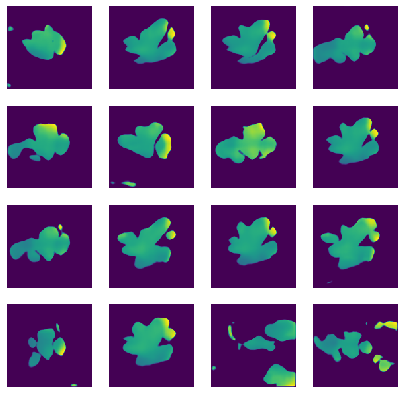

Iter 43001 | 12 ms | G loss = 6.6951e-01 | D loss = 6.9227e-01 | D acc = 0.55 | Remaining = 0:17:10     

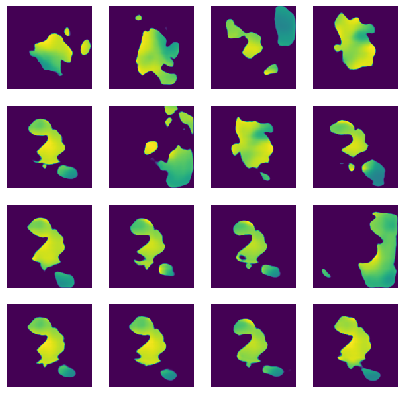

Iter 44001 | 2 ms | G loss = 9.8736e-01 | D loss = 5.1227e-01 | D acc = 0.78 | Remaining = 0:14:42      

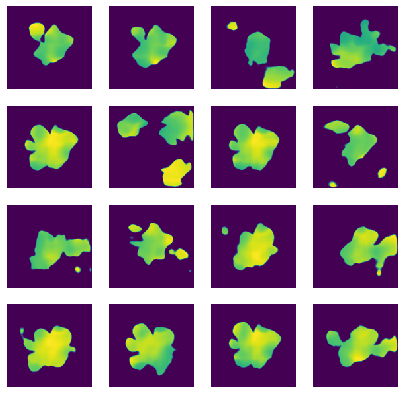

Iter 45001 | 2 ms | G loss = 1.9432e+00 | D loss = 6.5049e-01 | D acc = 0.62 | Remaining = 0:12:15      

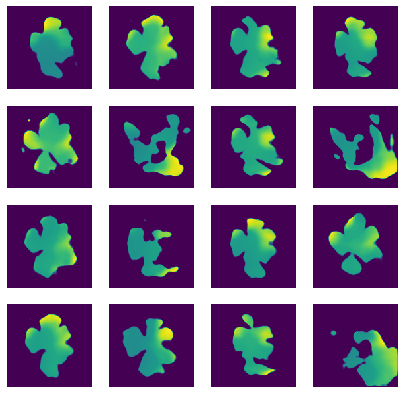

Iter 46001 | 2 ms | G loss = 1.1105e+00 | D loss = 3.0145e-01 | D acc = 0.95 | Remaining = 0:09:49      

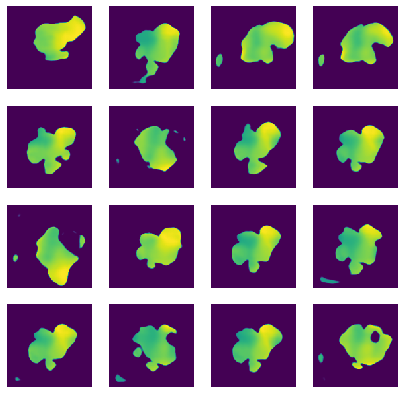

Iter 47001 | 2 ms | G loss = 1.0181e+00 | D loss = 6.6988e-01 | D acc = 0.55 | Remaining = 0:07:22      

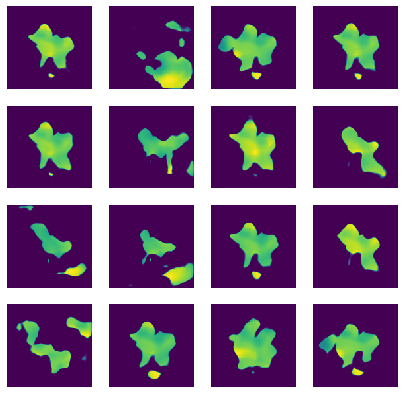

Iter 48001 | 2 ms | G loss = 1.3304e+00 | D loss = 5.7384e-01 | D acc = 0.70 | Remaining = 0:04:55      

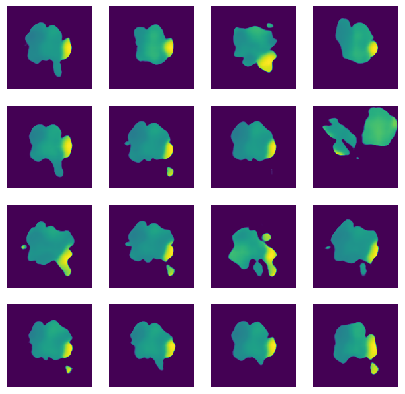

Iter 49001 | 2 ms | G loss = 7.2479e-01 | D loss = 5.4595e-01 | D acc = 0.73 | Remaining = 0:02:27      

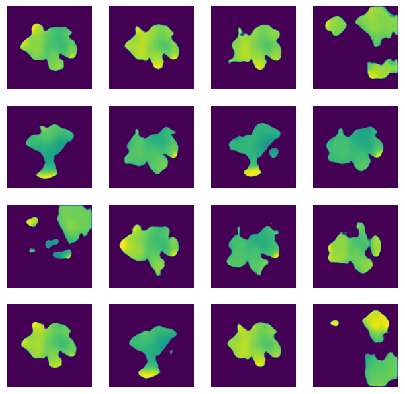

Iter 50001 | 2 ms | G loss = 1.1510e+00 | D loss = 4.6266e-01 | D acc = 0.83 | Remaining = 0:00:00      

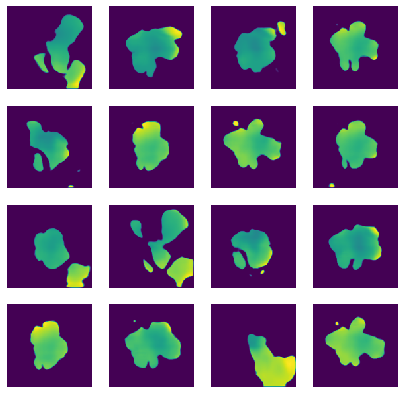

In [8]:
epochs = 50001
batch_size = 64

# binary cross-entropy loss
BCE = nn.BCELoss()
def augment(x):
    r = np.random.choice(4)
    return x.rot90(r, dims=[2,3])

length = len(images)
batches = int(length/batch_size)

# output labels for discriminator
real = torch.tensor(np.ones([batch_size, 1])).float().to(device)
fake = torch.tensor(np.zeros([batch_size, 1])).float().to(device)

# initialize time
t0 = time.time()
accD = 0.5

for epoch in range(epochs): 
    
    # initialize time
    t1 = time.time()
    
    # extract input and output batches, NOTE: we use .data to
    # detach the current batches from their history in order
    # to prevent the computational graph from growing
    p = np.random.permutation(length)
    start = 0 * batch_size
    stop = (0+1) * batch_size
    batch = augment(images[p[start:stop]].data.to(device))
    
    # generator
    optG.zero_grad()
    z = torch.tensor(np.random.normal(0, 1, [batch_size, latent_dim])).float().to(device)
    fake_batch = G(z)
    lossG = BCE(D(fake_batch), real)
    lossG.backward(retain_graph=True)
    optG.step()
    
    # if discriminator too good, train generator more
    if accD > 0.95:
        for i in range(10):
            optG.zero_grad()
            z = torch.tensor(np.random.normal(
                loc=0, 
                scale=1, 
                size=[batch_size, latent_dim])).float().to(device)
            fake_batch = G(z)
            lossG = BCE(D(fake_batch), real)
            lossG.backward(retain_graph=True)
            optG.step()

    # discriminator
    optD.zero_grad()
    real_pred = D(batch)
    fake_pred = D(fake_batch)
    real_lossD = BCE(real_pred, real)
    fake_lossD = BCE(fake_pred, fake)
    lossD = (real_lossD + fake_lossD) / 2
    lossD.backward()

    # accuracy
    real_nonzero = len(torch.nonzero(real_pred.round() - real))
    fake_nonzero = len(torch.nonzero(fake_pred.round() - fake))
    accD = 1 - (real_nonzero+fake_nonzero)/(2*batch_size)
    optD.step()
    
    # get time statistics
    elapsed, remaining, ms_per_iter = TimeRemaining(
        current_iter=epoch+1, 
        total_iter=epochs, 
        start_time=t0, 
        previous_time=t1, 
        ops_per_iter=batch_size)

    sys.stdout.write(('\rIter {0}'
                      +' | {1} ms'
                      +' | G loss = {2:1.4e}'
                      +' | D loss = {3:1.4e}'
                      +' | D acc = {4:1.2f}'
                      +' | Remaining = ').format(
        epoch+1,
        ms_per_iter,
        lossG.item(),
        lossD.item(),
        accD) + remaining + '     ')
    sys.stdout.flush()
    
    if np.mod(epoch, 1000) == 0:
        
        fig = plt.figure(figsize=(7, 7))
        for i in range(16):
            z = torch.tensor(np.random.normal(0, 1, [1, latent_dim])).float().to(device)
            reconstruction = G(z).cpu().detach().numpy()
            ax = fig.add_subplot(4, 4, i+1)
            plt.imshow(np.squeeze(reconstruction))
            plt.axis('off')
            plt.axis('tight')
        plt.show()
        torch.save(G.state_dict(), '../Weights/generator_{0:05d}'.format(epoch))
        torch.save(D.state_dict(), '../Weights/discriminator_{0:05d}'.format(epoch))